<a href="https://colab.research.google.com/github/azurename/Penghijauan/blob/main/Week_2_materi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 58.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Menampilkan 5 data paling atas

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Melihat missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['gender']=df['gender'].astype(str)

In [ ]:
null_per_column = df.isnull().sum()
na_per_column = df.isna().sum()
print("Jumlah nilai null per kolom:\n", null_per_column)
print("Jumlah nilai na per kolom:\n", na_per_column)

Jumlah nilai null per kolom:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Jumlah nilai na per kolom:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype

### melihat deskripsi data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
for i in df.columns :
    print(i)
    print(df[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

### Melihat distribusi data

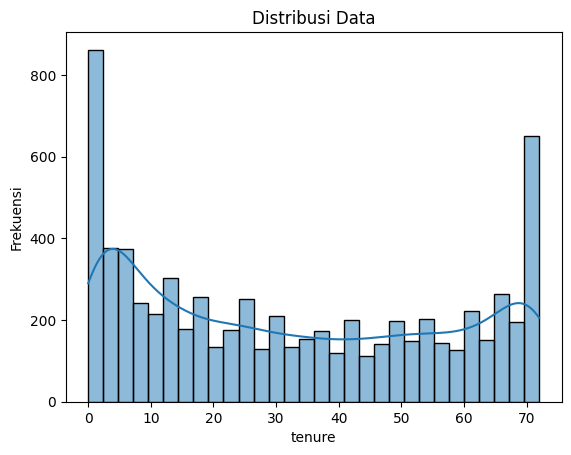

In [ ]:
sns.histplot(df['tenure'], kde=True, bins=30)
plt.xlabel('tenure')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

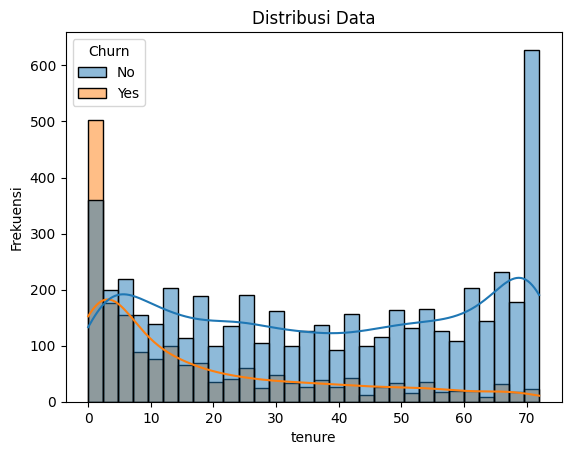

In [ ]:
sns.histplot(df[['tenure', 'Churn']], x='tenure', hue='Churn', kde=True, bins=30)
plt.xlabel('tenure')
plt.ylabel('Frekuensi')
plt.title('Distribusi Data')
plt.show()

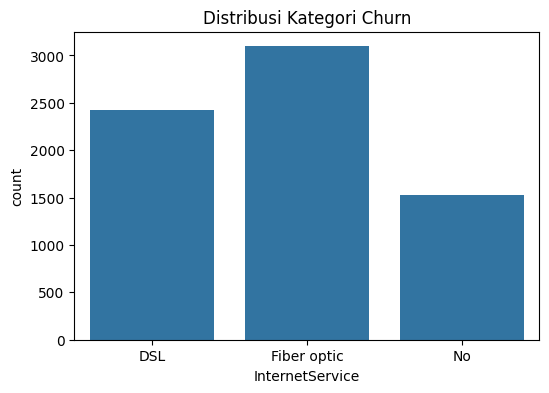

In [ ]:
# Membuat bar plot untuk data kategorikal
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="InternetService")

plt.title("Distribusi Kategori Churn")
plt.show()

In [ ]:
print(df['InternetService'].value_counts())

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


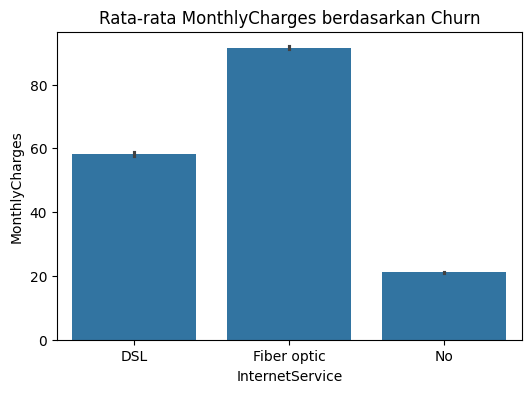

In [ ]:
# Membuat bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="InternetService", y="MonthlyCharges", estimator=np.mean)

plt.title("Rata-rata MonthlyCharges berdasarkan Churn")
plt.show()

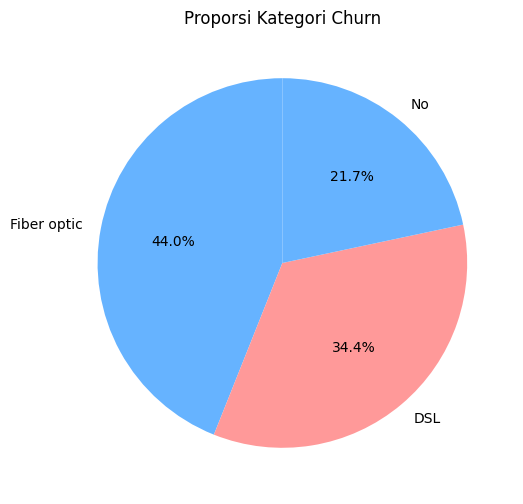

In [ ]:
# Membuat pie chart
kategori_counts = df["InternetService"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"], startangle=90)
plt.title("Proporsi Kategori Churn")
plt.show()

### melihat outlier

In [ ]:
# Membuat box plot
kategori_counts = df["Churn"].value_counts()


In [ ]:
# Membuat box plot
kategori_counts = df["Churn"].value_counts()

### Melihat data time series

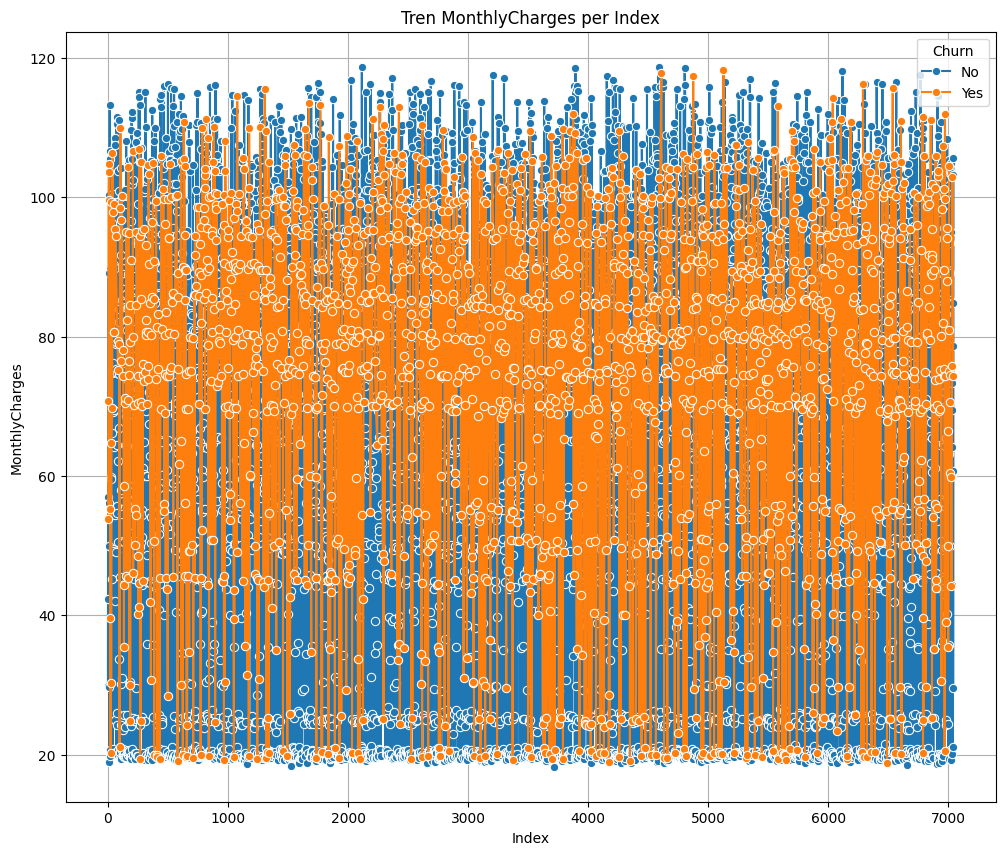

In [ ]:
# Membuat line plot
plt.figure(figsize=(12, 10))
sns.lineplot(data=df, x=df.index, y="MonthlyCharges", hue="Churn", marker="o", color="b", linestyle="-")
plt.title("Tren MonthlyCharges per Index")
plt.xlabel("Index")
plt.ylabel("MonthlyCharges")
plt.grid(True)  # Menambahkan grid
plt.show()

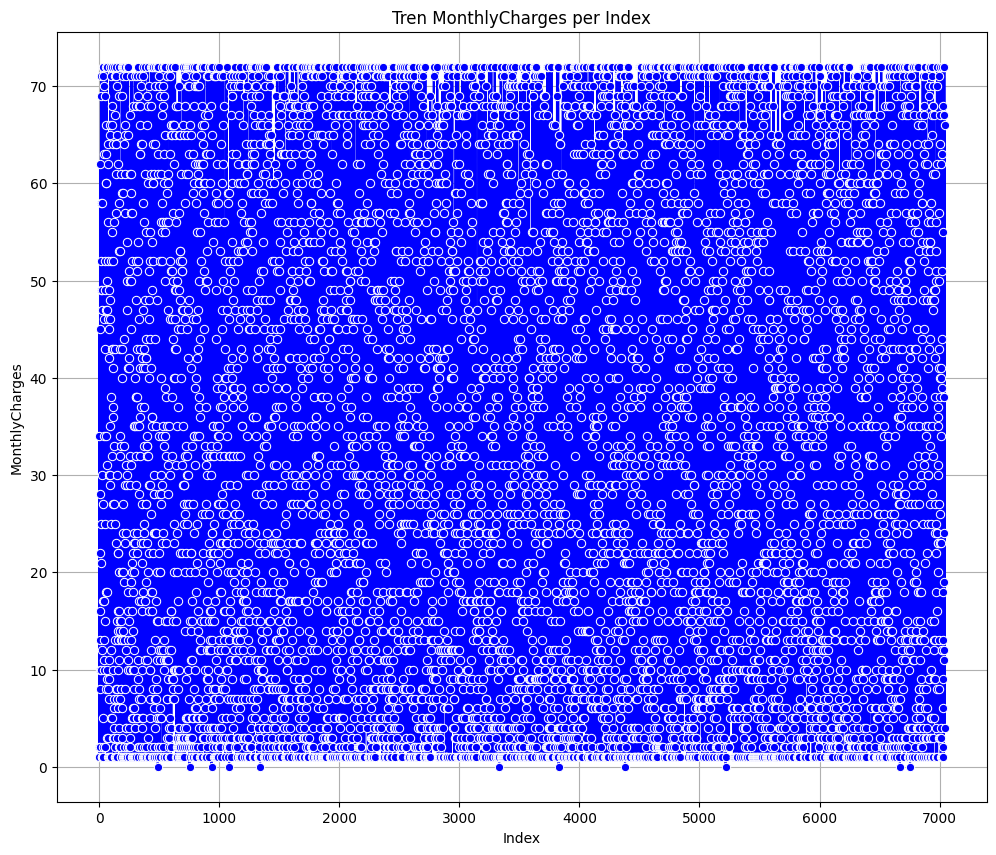

In [ ]:
# Membuat line plot
plt.figure(figsize=(12, 10))
sns.lineplot(data=df, x=df.index, y="tenure", marker="o", color="b", linestyle="-")
plt.title("Tren MonthlyCharges per Index")
plt.xlabel("Index")
plt.ylabel("MonthlyCharges")
plt.grid(True)  # Menambahkan grid
plt.show()


### melihat pesebaran data

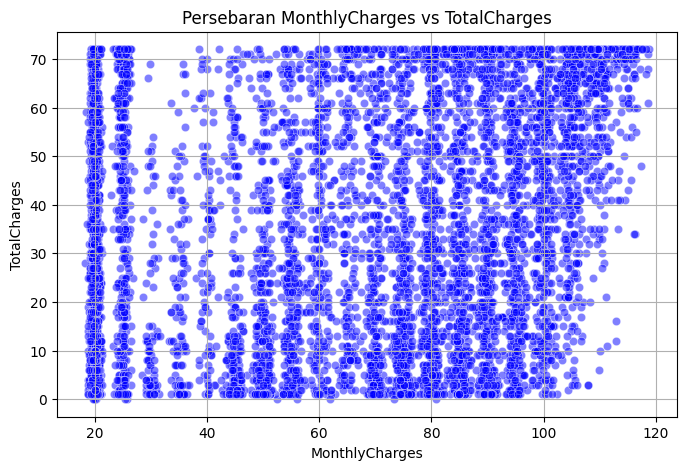

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MonthlyCharges", y="tenure", alpha=0.5, color="b")
plt.title("Persebaran MonthlyCharges vs TotalCharges")
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.grid(True)
plt.show()

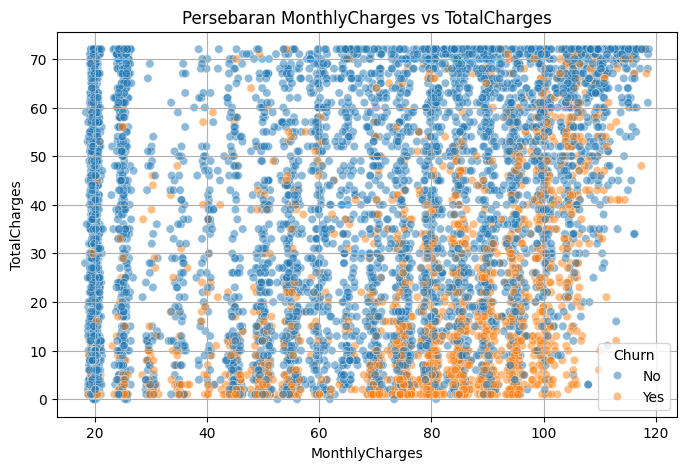

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MonthlyCharges", y="tenure", hue="Churn", alpha=0.5, color="b")
plt.title("Persebaran MonthlyCharges vs TotalCharges")
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.grid(True)
plt.show()

Korelasi